In [1]:
hw_done = True    ## change this to True to mark your homework as done.

### Astrostatistics, University of Washington
# Homework 2


## Problem 1

The file `data/flux.txt` contains a series of calibrated measurements of the flux of a star (in some arbitrary flux units).

Assuming the star is not variable, estimate:
1. the true stellar flux and the error of that estimate and
1. the precision of my measurement apparatus.

## Problem 2

Test scores in the astrostatistics class at the University of Washington have historically been normally distributed with $\mu = 85$ and $\sigma=7$. Assuming past predicts the future:

1. Compute the probability you will score 100 or greater when you take the test.
1. Compute the number of your classmates who will score between 84 and 92 (the class has 26 students; assume everyone will take the test).
1. If I tell you the probability of failing the test (i.e., scoring below some threshold $T$) is 0.018%, compute the threshold $T$.

Note: you should find [the functions of `scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) very useful.

## Problem 3

Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a histogram, with the bin size determined using the Freedman-Diaconis
rule. Show (Poissonian) uncertainty for each histogram value, and overplot the
true distribution. Do the same for a Cauchy distribution with the same $\mu$ and $\gamma=0.2$. 

Use a random seed of 42, with the default numpy random number generator (i.e., use `np.random.seed(42)` to set it).

"Poissonian uncertainty": for each bin in the histogram, plot the error bar whose half-height is the square root of the bin height.

## Problem 4
Repeat the previous problem, but now concatenate wit the Gaussian sample 
another sample of 10,000 data values drawn from a Cauchy distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Discuss the difference.  

# Solutions

### Some useful definitions and functions

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm, sem
import seaborn as sns; sns.set() # set default plot styles
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=False)

In [3]:
#Problem 1
data= np.loadtxt('data/flux.txt')
print(np.shape(data))
print(np.median(data)) ##checking mean and median is close to make sure there are no weird outliers that messed up our measurement
estimated_flux = np.mean(data)
print('estimated flux', estimated_flux)
#by definition standard mean of the error is s/sqrt(N)
error_of_estimate = np.std(data) / np.sqrt(len(data))
print('error of estimate', error_of_estimate)
#precision of measurement apparatus should be the standard deviation
print('precision of measurement aparatus', np.std(data))

(100,)
33.7305
estimated flux 33.961529999999996
error of estimate 0.9036086730941664
precision of measurement aparatus 9.036086730941664


In [4]:
#Problem 2
probability_100_or_greater = 1 - norm.cdf(100, 85, 7)
print('probability of scoring 100 or greater',probability_100_or_greater) 
probability_of_scoring_between_84_and_92 = (1 - norm.cdf(84, 85, 7))-(1 - norm.cdf(92, 85, 7))
print('probability of scoring between 84 and 92', probability_of_scoring_between_84_and_92) 
print('number of students scoring between 84 and 92', 26*probability_of_scoring_between_84_and_92)
print('number of students scoring between 84 and 92 is 10(after rounding up)')
treshhold = norm(85, 7).ppf(0.018/100)
print('failing threshold', treshhold)


probability of scoring 100 or greater 0.016062285603828275
probability of scoring between 84 and 92 0.39814324288501113
number of students scoring between 84 and 92 10.351724315010289
number of students scoring between 84 and 92 is 10(after rounding up)
failing threshold 60.025445320586925


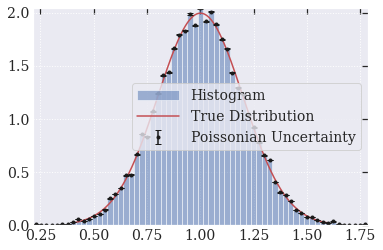

In [5]:
#problem 3
np.random.seed(42)

mu = 1.0
sigma = 0.2
data_normal = np.random.normal(mu, sigma, 10000)

iqr = np.percentile(data_normal, 75) - np.percentile(data_normal, 25)
bin_width = 2 * iqr / (len(data_normal) ** (1/3))

hist, bins, _ = plt.hist(data_normal, bins='auto', density=True, alpha=0.5, label='Histogram')
errors = np.sqrt(hist)
errors = errors/(bin_width*10000)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2)), color='r', label='True Distribution')
bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.errorbar(bin_centers, hist, yerr=errors, fmt='.', color='k', label='Poissonian Uncertainty')
plt.legend()
plt.show()


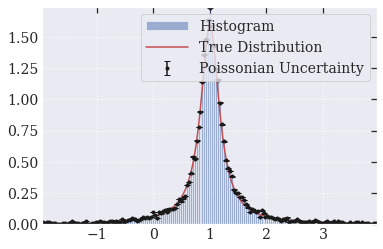

In [6]:
gamma = 0.2
data_cauchy = cauchy(mu,gamma).rvs(10000)
data_cauchy  = data_cauchy[(data_cauchy >-2) & (data_cauchy <4)]
hist, bins, _ = plt.hist(data_cauchy, bins='auto', density=True, alpha=0.5, label='Histogram')
errors = np.sqrt(hist)
errors = errors/(bin_width*10000)
x = np.linspace(mu - 10*gamma, mu + 10*gamma, 1000)
pdf_cauchy = 1 / (np.pi * gamma * (1 + ((x - mu) / gamma)**2))
plt.plot(x, pdf_cauchy, color='r', label='True Distribution')

bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.errorbar(bin_centers, hist, yerr=errors, fmt='.', color='k', label='Poissonian Uncertainty')
plt.legend()
plt.show()


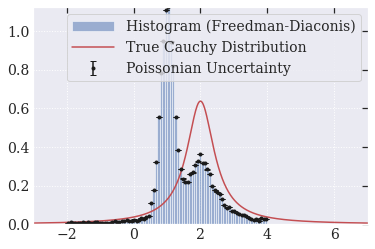

In [7]:
#problem 4
mu_gaussian = 1.0
sigma_gaussian = 0.2
data_normal = np.random.normal(mu_gaussian, sigma_gaussian, 10000)

mu_cauchy = 2.0
gamma_cauchy = 0.5
data_cauchy = cauchy(mu_cauchy, gamma_cauchy).rvs(10000)
data_cauchy  = data_cauchy[(data_cauchy >-2) & (data_cauchy <4)]
concatenated_data = np.concatenate((data_normal, data_cauchy))

# Freedman-Diaconis rule
iqr = np.percentile(concatenated_data, 75) - np.percentile(concatenated_data, 25)
bin_width_fd = 2 * iqr / (len(concatenated_data) ** (1/3))

hist, bins, _ = plt.hist(concatenated_data, bins='auto', density=True, alpha=0.5, label='Histogram (Freedman-Diaconis)')

errors = np.sqrt(hist)
errors = errors / (bin_width_fd * len(concatenated_data))

x = np.linspace(mu_cauchy - 10 * gamma_cauchy, mu_cauchy + 10 * gamma_cauchy, 1000)
pdf_cauchy = 1 / (np.pi * gamma_cauchy * (1 + ((x - mu_cauchy) / gamma_cauchy) ** 2))
plt.plot(x, pdf_cauchy, color='r', label='True Cauchy Distribution')

bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.errorbar(bin_centers, hist, yerr=errors, fmt='.', color='k', label='Poissonian Uncertainty')

plt.legend()
plt.show()


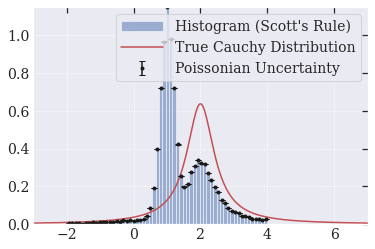

In [8]:

mu_gaussian = 1.0
sigma_gaussian = 0.2
data_normal = np.random.normal(mu_gaussian, sigma_gaussian, 10000)

mu_cauchy = 2.0
gamma_cauchy = 0.5
data_cauchy = cauchy(mu_cauchy, gamma_cauchy).rvs(10000)
data_cauchy  = data_cauchy[(data_cauchy >-2) & (data_cauchy <4)]
concatenated_data = np.concatenate((data_normal, data_cauchy))

#Scott's rule
bin_width_scott = 3.5 * np.std(concatenated_data) / (len(concatenated_data) ** (1/3))
hist, bins, _ = plt.hist(concatenated_data, bins='scott', density=True, alpha=0.5, label="Histogram (Scott's Rule)")

errors = np.sqrt(hist)
errors = errors / (bin_width_scott * len(concatenated_data))

x = np.linspace(mu_cauchy - 10 * gamma_cauchy, mu_cauchy + 10 * gamma_cauchy, 1000)
pdf_cauchy = 1 / (np.pi * gamma_cauchy * (1 + ((x - mu_cauchy) / gamma_cauchy) ** 2))
plt.plot(x, pdf_cauchy, color='r', label='True Cauchy Distribution')

bin_centers = 0.5 * (bins[1:] + bins[:-1])
plt.errorbar(bin_centers, hist, yerr=errors, fmt='.', color='k', label='Poissonian Uncertainty')

plt.legend()
plt.show()
